# Importação das Bibliotecas e da base em .csv

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
import math

In [58]:
df = pd.read_csv("World University Rankings 2023.csv")

# Importação e tratamento dos dados

In [59]:
df

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
1,2,Harvard University,United States,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,3,Stanford University,United States,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2336,-,University of the West of Scotland,NaN,NaN,NaN,NaN,NaN,34.0–39.2,24.1,15.5,61.5,37.9,76.8
2337,-,University of Windsor,NaN,NaN,NaN,NaN,NaN,34.0–39.2,35.1,29.4,34.5,44.2,88.7
2338,-,University of Wolverhampton,NaN,NaN,NaN,NaN,NaN,34.0–39.2,18.2,14.3,68.8,37.3,72.0
2339,-,University of Wuppertal,NaN,NaN,NaN,NaN,NaN,34.0–39.2,26.4,26.7,52.8,52.1,47.6


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   University Rank              2341 non-null   object 
 1   Name of University           2233 non-null   object 
 2   Location                     2047 non-null   object 
 3   No of student                2209 non-null   object 
 4   No of student per staff      2208 non-null   float64
 5   International Student        2209 non-null   object 
 6   Female:Male Ratio            2128 non-null   object 
 7   OverAll Score                1799 non-null   object 
 8   Teaching Score               1799 non-null   float64
 9   Research Score               1799 non-null   float64
 10  Citations Score              1799 non-null   float64
 11  Industry Income Score        1799 non-null   float64
 12  International Outlook Score  1799 non-null   float64
dtypes: float64(6), obj

Na célula acima vemos que temos diversos valores nulos e que as colunas  "No of student", "Internacional Student", "Female:Male Ratio","OverAll Score" e "Teaching Score" estão como object, mas deverão ser passadas para int64 ou float

In [61]:
df['No of student'] = pd.to_numeric(df['No of student'].str.replace(',', ''), errors='coerce')
df['International Student'] = pd.to_numeric(df['International Student'].str.replace('%', ''), errors='coerce')
df['OverAll Score'] = pd.to_numeric(df['OverAll Score'].str.replace(',', ''), errors='coerce')

Feito a transformação das colunas  "No of student", "Internacional Student" e "OverAll Score" do tipo object para int, abaixo foi extraído o valor para a porcentagem de mulheres, que necessitou de um passo a mais para a transformação, visto que o valor estava em uma comparação Mulherx Homem

In [62]:
df["Female:Male Ratio"] = df["Female:Male Ratio"].fillna(value='')

In [63]:
df['Female Ratio'] = df['Female:Male Ratio'].str.split(':').str[0].str.strip()
df['Female Ratio'] = pd.to_numeric(df['Female Ratio'], errors='coerce')

In [64]:
df.drop("Female:Male Ratio", axis=1)

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score,Female Ratio
0,1,University of Oxford,United Kingdom,20965.0,10.6,42.0,96.4,92.3,99.7,99.0,74.9,96.2,48.0
1,2,Harvard University,United States,21887.0,9.6,25.0,95.2,94.8,99.0,99.3,49.5,80.5,50.0
2,3,University of Cambridge,United Kingdom,20185.0,11.3,39.0,94.8,90.9,99.5,97.0,54.2,95.8,47.0
3,3,Stanford University,United States,16164.0,7.1,24.0,94.8,94.2,96.7,99.8,65.0,79.8,46.0
4,5,Massachusetts Institute of Technology,United States,11415.0,8.2,33.0,94.2,90.7,93.6,99.8,90.9,89.3,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2336,-,University of the West of Scotland,NaN,NaN,NaN,NaN,NaN,24.1,15.5,61.5,37.9,76.8,NaN
2337,-,University of Windsor,NaN,NaN,NaN,NaN,NaN,35.1,29.4,34.5,44.2,88.7,NaN
2338,-,University of Wolverhampton,NaN,NaN,NaN,NaN,NaN,18.2,14.3,68.8,37.3,72.0,NaN
2339,-,University of Wuppertal,NaN,NaN,NaN,NaN,NaN,26.4,26.7,52.8,52.1,47.6,NaN


Com isso temos o primeiro tratamento dos dados, sendo feito a checagem dos tipos de dados de cada coluna, a transformação do porcentagem entre mulheres e homens par uma coluna de valor númerico único, no caso escolhido somente para o valor de mulheres, os valores NaN (Not-a-Number) serão tratados mediante a cada análise para que possamos ter valores confiáveis dependendo da análise.

# Análise da quantidade de estudantes no top 10 países

In [65]:
df_students = df.groupby("Location")["No of student"].sum().to_frame().reset_index().sort_values(by = "No of student", ascending=False)
df_students = df_students[df_students["Location"] != '']
df_students = df_students[:10]
df_students

,Location,No of student
109,United States,3895900.0
16,China,2674751.0
25,Egypt,2617820.0
103,Turkey,1869317.0
10,Brazil,1769257.0
108,United Kingdom,1665615.0
46,Japan,1337855.0
94,Spain,1226882.0
62,Mexico,1125486.0
44,Italy,1114178.0


Text(0.5, 0, 'País')

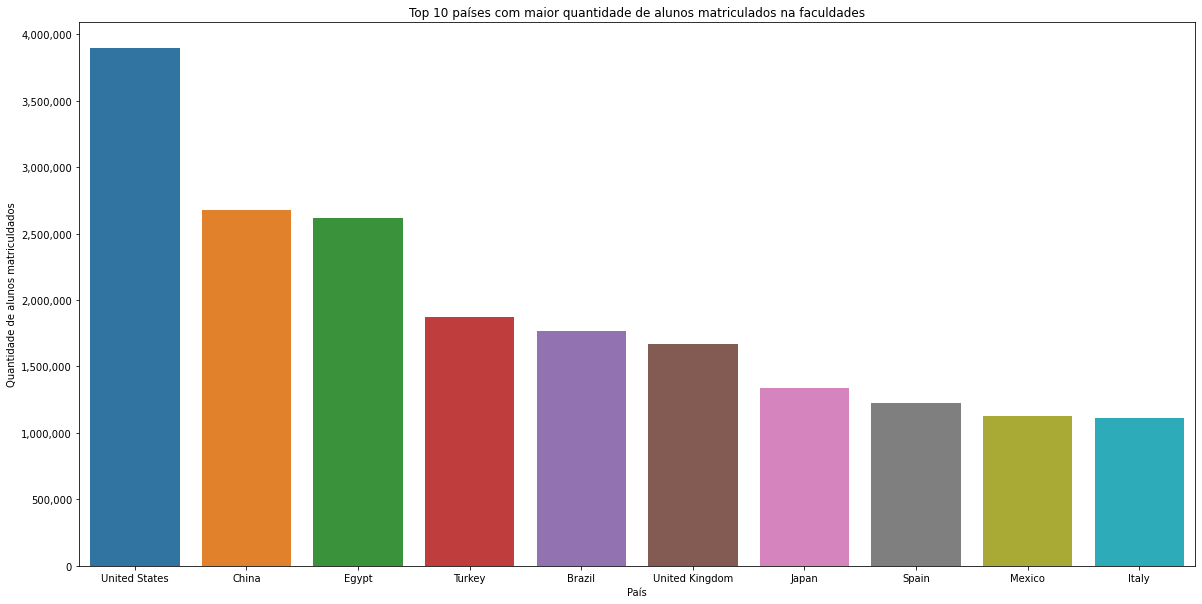

In [66]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
sns.barplot(data = df_students, x="Location", y = "No of student")

def format_func(x, _):
    return f'{int(x):,}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

plt.title("Top 10 países com maior quantidade de alunos matriculados na faculdades")
plt.ylabel("Quantidade de alunos matriculdados")
plt.xlabel("País")

# Análise da quantidade de mulheres no top 10 países

In [67]:
lista_mulheres = []
for i in range(0,len(df)):
    if df["Female Ratio"][i] != '' and df["No of student"][i] != '':
        lista_mulheres.append(df["Female Ratio"][i]*df["No of student"][i])
    else:
        lista_mulheres.append('')

In [68]:
df["Quantidade de Mulheres"] = lista_mulheres
df["Quantidade de Mulheres"] = df["Quantidade de Mulheres"]/100

In [69]:
df_mulheres = df.groupby("Location")["Quantidade de Mulheres"].sum().to_frame().reset_index().sort_values(by = "Quantidade de Mulheres", ascending=False)
df_mulheres = df_mulheres[df_mulheres["Location"] != '']
df_mulheres = df_mulheres[:10]

In [70]:
df_mulheres

,Location,Quantidade de Mulheres
109,United States,1985334.59
25,Egypt,1295943.47
108,United Kingdom,951649.20
10,Brazil,885324.64
103,Turkey,882369.58
16,China,831659.60
94,Spain,684693.00
44,Italy,629703.72
62,Mexico,582164.34
30,France,577467.06


Text(0.5, 0, 'País')

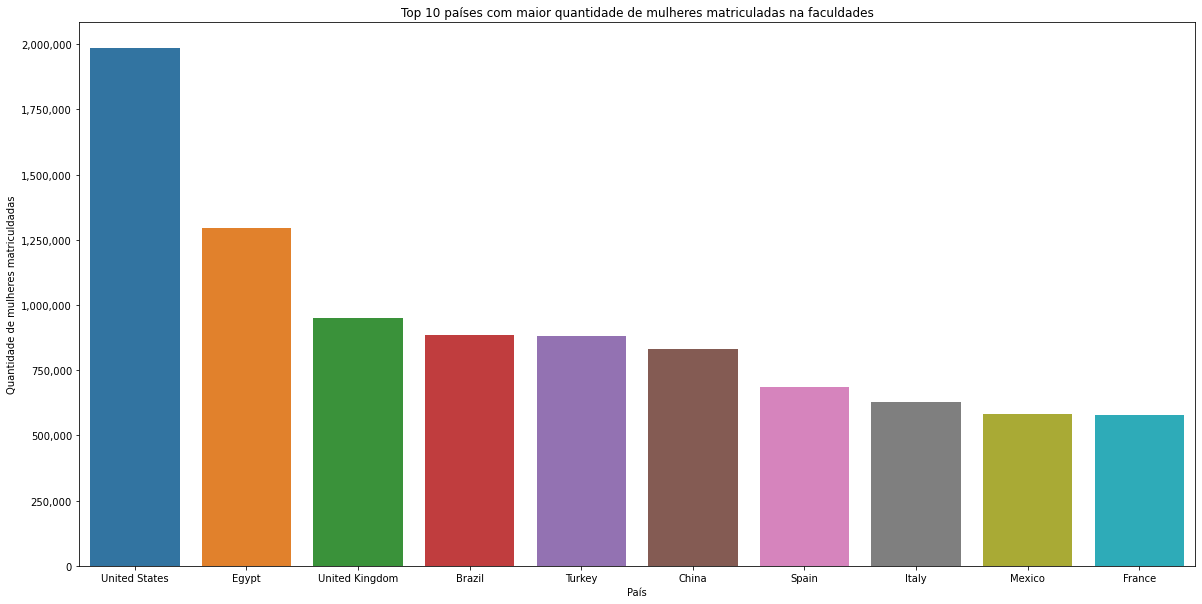

In [71]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
sns.barplot(data = df_mulheres, x="Location", y = "Quantidade de Mulheres")

def format_func(x, _):
    return f'{int(x):,}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

plt.title("Top 10 países com maior quantidade de mulheres matriculadas na faculdades")
plt.ylabel("Quantidade de mulheres matriculdadas")
plt.xlabel("País")

# DataFrame intermediário para a análise de relação entre a nota dos professores e outras variáveis

In [73]:
df_professor = df.dropna()
df_professor

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score,Female Ratio,Quantidade de Mulheres
0,1,University of Oxford,United Kingdom,20965.0,10.6,42.0,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2,48.0,10063.20
1,2,Harvard University,United States,21887.0,9.6,25.0,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5,50.0,10943.50
2,3,University of Cambridge,United Kingdom,20185.0,11.3,39.0,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8,47.0,9486.95
3,3,Stanford University,United States,16164.0,7.1,24.0,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8,46.0,7435.44
4,5,Massachusetts Institute of Technology,United States,11415.0,8.2,33.0,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3,40.0,4566.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,194,Medical University of Vienna,Austria,7274.0,8.4,33.0,50 : 50,54.6,35.0,27.6,94.0,61.2,81.7,50.0,3637.00
193,194,University of Miami,United States,17009.0,10.8,16.0,53 : 47,54.6,48.4,33.5,81.0,48.3,60.2,53.0,9014.77
194,196,University of Erlangen-Nuremberg,Germany,30303.0,43.4,13.0,51 : 49,54.5,44.6,47.5,68.8,90.7,53.5,51.0,15454.53
196,198,Durham University,United Kingdom,18425.0,14.1,35.0,54 : 46,54.4,40.0,44.6,70.0,39.4,94.3,54.0,9949.50


In [74]:
df_professor.columns

Index(['University Rank', 'Name of University', 'Location', 'No of student',
       'No of student per staff', 'International Student', 'Female:Male Ratio',
       'OverAll Score', 'Teaching Score', 'Research Score', 'Citations Score',
       'Industry Income Score', 'International Outlook Score', 'Female Ratio',
       'Quantidade de Mulheres'],
      dtype='object')

In [75]:
df_professor.isna().sum()

University Rank                0
Name of University             0
Location                       0
No of student                  0
No of student per staff        0
International Student          0
Female:Male Ratio              0
OverAll Score                  0
Teaching Score                 0
Research Score                 0
Citations Score                0
Industry Income Score          0
International Outlook Score    0
Female Ratio                   0
Quantidade de Mulheres         0
dtype: int64

<AxesSubplot:xlabel='Teaching Score', ylabel='Research Score'>

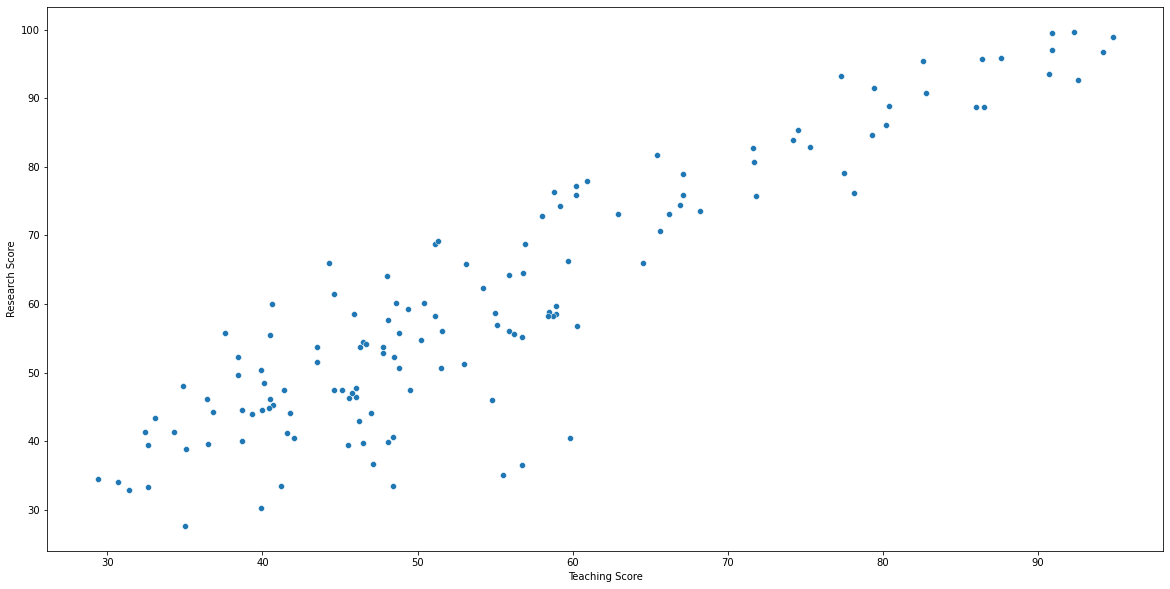

In [76]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
sns.scatterplot(data=df_professor, x="Teaching Score",y ="Research Score")

In [77]:
correlacao = df_professor['Teaching Score'].corr(df_professor['Research Score'])
print(f'Correlação de Pearson: {correlacao}')
covariancia = df_professor['Teaching Score'].cov(df_professor['Research Score'])
print(f'Covariância: {covariancia}')

Correlação de Pearson: 0.9079095096677158
Covariância: 274.8371416122005


<AxesSubplot:xlabel='Teaching Score', ylabel='Industry Income Score'>

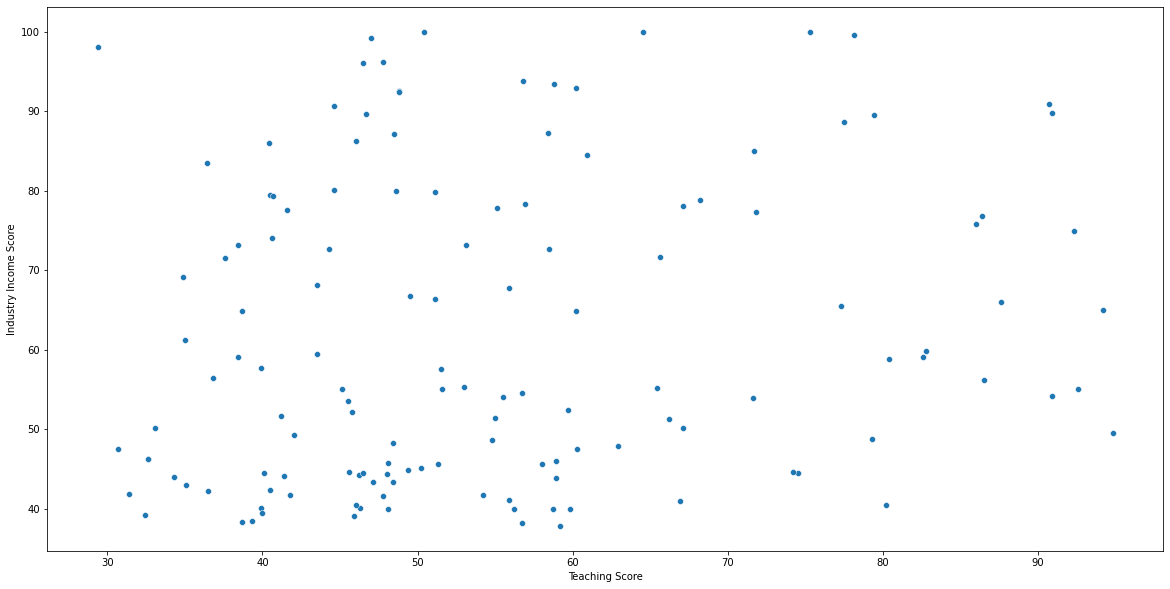

In [78]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
sns.scatterplot(data=df_professor, x="Teaching Score",y ="Industry Income Score")

In [79]:
correlacao = df_professor['Teaching Score'].corr(df_professor['Industry Income Score'])
print(f'Correlação de Pearson: {correlacao}')
covariancia = df_professor['Teaching Score'].cov(df_professor['Industry Income Score'])
print(f'Covariância: {covariancia}')

Correlação de Pearson: 0.17236027115502464
Covariância: 53.71143790849673


<AxesSubplot:xlabel='Teaching Score', ylabel='Citations Score'>

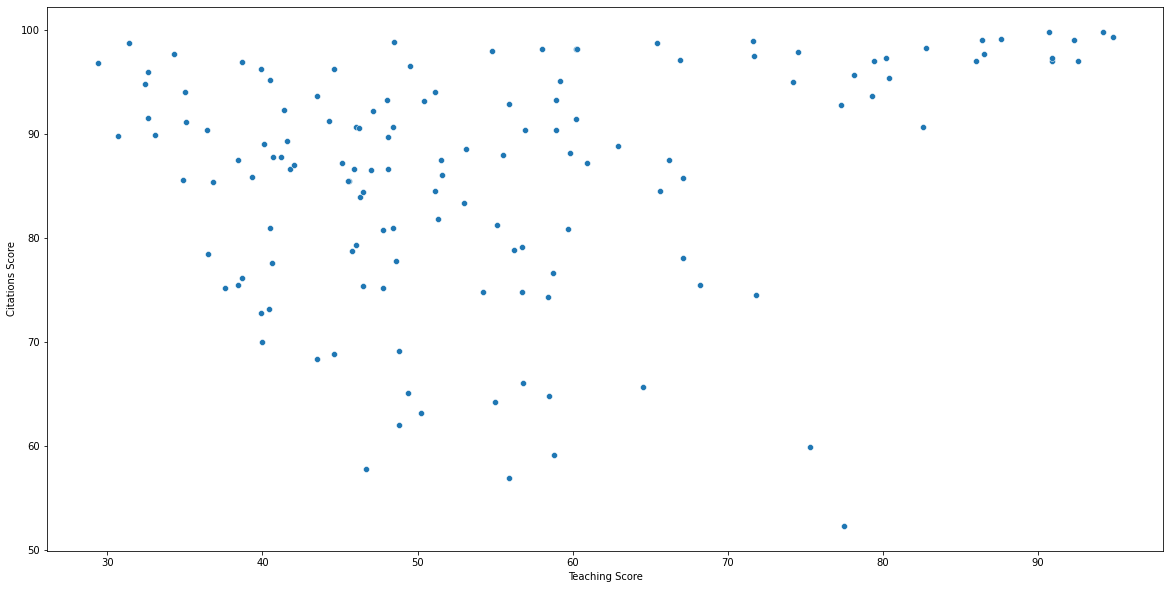

In [80]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
sns.scatterplot(data=df_professor, x="Teaching Score",y ="Citations Score")

In [81]:
import pandas as pd

# Cálculo da correlação de Pearson
correlation_matrix = df[['Teaching Score', 'OverAll Score', 'Research Score','No of student',
                         'Citations Score', 'Industry Income Score', 
                         'International Outlook Score', 'Female Ratio']].corr()


<AxesSubplot:>

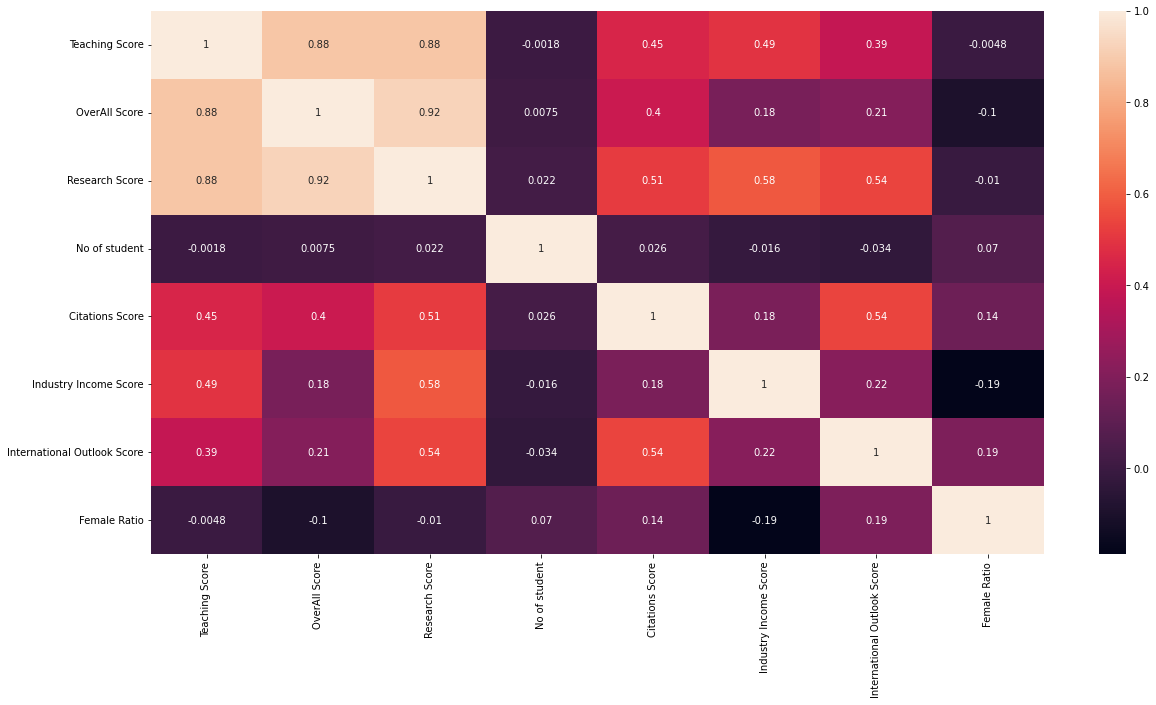

In [82]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True)

Com a análise vindo dos 3 gráficos e do nosso mapa de correlações vemos que Teching Score, Overall Score e Research Score tem uma boa correlação entre si, com isso temos que o aumento de uma delas nos levaria a um aumento de mesmo grau nas outras duas.
As outras variáveis,entretanto, vemos uma baixa correlação, positiva ou negativa, com isso não é possível aferir que um aumento ou diminuição em uma determinada variável traria resultados satisfatorio no aumento dos demais indicadores.

# Análise de Comparação entre Grupos (Utilizando boxplots)

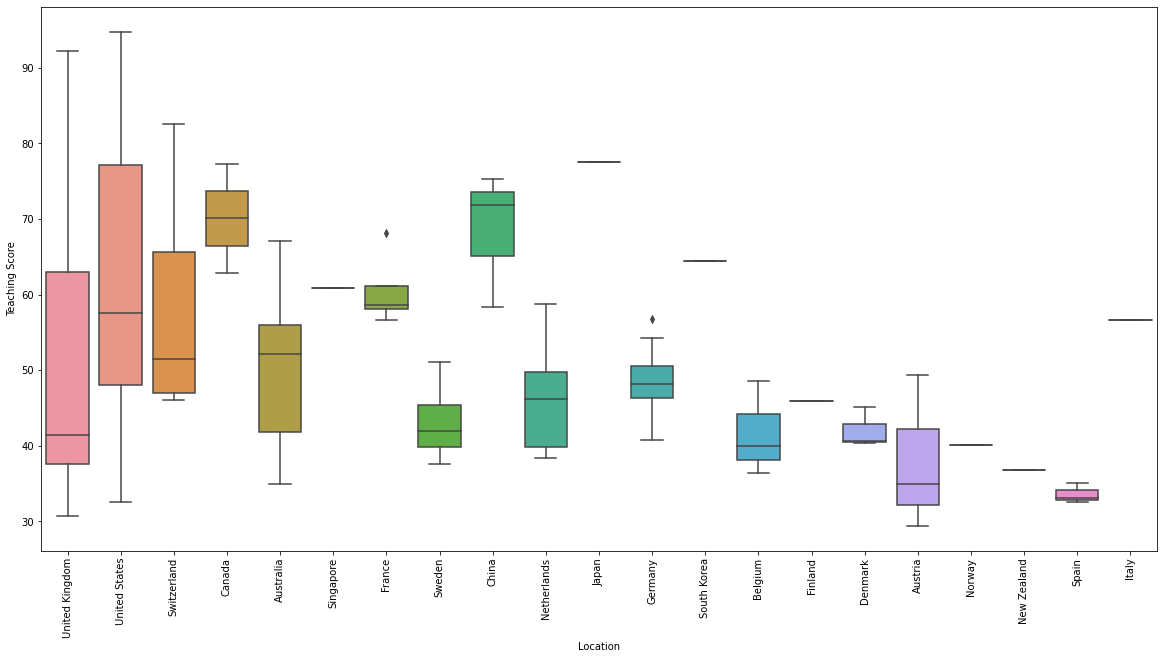

In [83]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
sns.boxplot(x='Location', y='Teaching Score', data=df_professor)
plt.xticks(rotation=90)
plt.show()

In [98]:
 df_professor.groupby("Location")["No of student"].sum().reset_index().sort_values(by='No of student', ascending=False)

,Location,No of student
20,United States,1591894.0
19,United Kingdom,427990.0
8,Germany,341270.0
0,Australia,219890.0
11,Netherlands,147097.0
3,Canada,133920.0
4,China,110222.0
7,France,108103.0
16,Spain,88902.0
2,Belgium,79817.0


Com a análise de Boxplot vemos que, para os países selecionados, não há uma grande aparição de outliers, entretanto os dados para uma populaçação grande de alunos torna-se mais dispersa, fazendo aassim uma variabilidade maior do rating dos professores, podendo assim ser aferido que em uma população alta de alunos, há uma variedade de universidade analisadas, fazendo com que haja uma discrepância entre as notas analisadas

# Considerações finais

Com a análise pode-se observar que as variáveis Teaching Score, OverAll Score, Research Score tem uma forte correlação entre si, sendo um ótimo indicio, para caso uma faculdade queira aumentar um dos atributos, mas seja de difícil melhoria, podendo melhorar outro que há uma forte tendência de melhora caso aconteça.
Com a análise utilizando Boxplot podemos obervar que os dados estão aderentes, tendo pouco outliers observados, não sendo assim necessário uma limpeza caso queiramos montar um modelo de predição com os dados, pois os outliers seriam de baixo impacto, entretando há se de observar que pela grande quantidade de dados vindo de países de alto investimento a análise de instituições do Sul geográfico pode ser impactado pelo baixa observação dos mesmos.